In [ ]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import os

# Load data
if os.path.exists('Files\\Code Generated CSV\\station_suitability_scores.csv'):
    df = pd.read_csv('Files\\Code Generated CSV\\station_suitability_scores.csv')
else:
    raise FileNotFoundError('station_suitability_scores.csv not found.')

# Standardize column names to lower case for robust matching
df.columns = [col.lower() for col in df.columns]

# Handle alternate column names
rename_dict = {}
if 'station_key' in df.columns and 'station_id' not in df.columns:
    rename_dict['station_key'] = 'station_id'
if 'sessions_count_final' in df.columns and 'sessions_count' not in df.columns:
    rename_dict['sessions_count_final'] = 'sessions_count'
if 'sessions' in df.columns and 'sessions_count' not in df.columns:
    rename_dict['sessions'] = 'sessions_count'
if 'lat' in df.columns and 'latitude' not in df.columns:
    rename_dict['lat'] = 'latitude'
if 'lon' in df.columns and 'longitude' not in df.columns:
    rename_dict['lon'] = 'longitude'
df = df.rename(columns=rename_dict)

# Validate columns
required_cols = ["latitude", "longitude"]
for col in required_cols:
    if col not in df.columns:
        raise ValueError(f"Missing required column: {col}")

if "suitability_score" not in df.columns:
    df["suitability_score"] = 0.5  # default

label_col = "station_name" if "station_name" in df.columns else df.columns[0]
sessions_col = None
for col in ["sessions_count", "total_sessions", "sessions"]:
    if col in df.columns:
        sessions_col = col
        break
df["_sessions"] = df[sessions_col] if sessions_col else 1

# Drop rows with missing coordinates or session counts
df = df.dropna(subset=["latitude", "longitude"])

# Create base map centered on Mumbai
center_lat = df["latitude"].mean()
center_lon = df["longitude"].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Add existing stations (blue markers)
for _, row in df.iterrows():
    folium.Marker(
        location=[row["latitude"], row["longitude"]],
        popup=f"{row[label_col]}<br>Suitability: {round(row['suitability_score'],2)}",
        icon=folium.Icon(color="blue", icon="bolt", prefix="fa")
    ).add_to(m)

# Add high-suitability predictions (green circle markers)
threshold = 0.8
high = df[df["suitability_score"] >= threshold]
for _, row in high.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=8,
        color="green",
        fill=True,
        fill_opacity=0.7,
        popup=f"High Suitability: {round(row['suitability_score'],2)}"
    ).add_to(m)

# Add heatmap layer
if "_sessions" in df.columns:
    heat_data = [[row["latitude"], row["longitude"], row["_sessions"]] for _, row in df.iterrows()]
else:
    heat_data = [[row["latitude"], row["longitude"], 1] for _, row in df.iterrows()]
HeatMap(heat_data, radius=15, blur=10).add_to(m)

# Save map to HTML file
m.save("ev_station_prediction_map.html")
print("Map saved as ev_station_prediction_map.html. Open this file in your browser to view the map.")

Map saved as ev_station_prediction_map.html. Open this file in your browser to view the map.


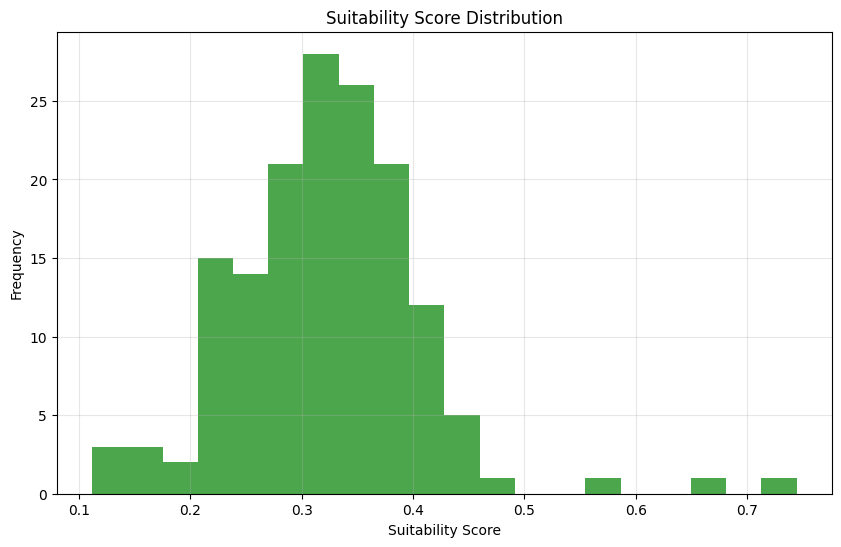

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(feature_df['suitability_score'], bins=20, color='green', alpha=0.7)
plt.title("Suitability Score Distribution")
plt.xlabel("Suitability Score")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()


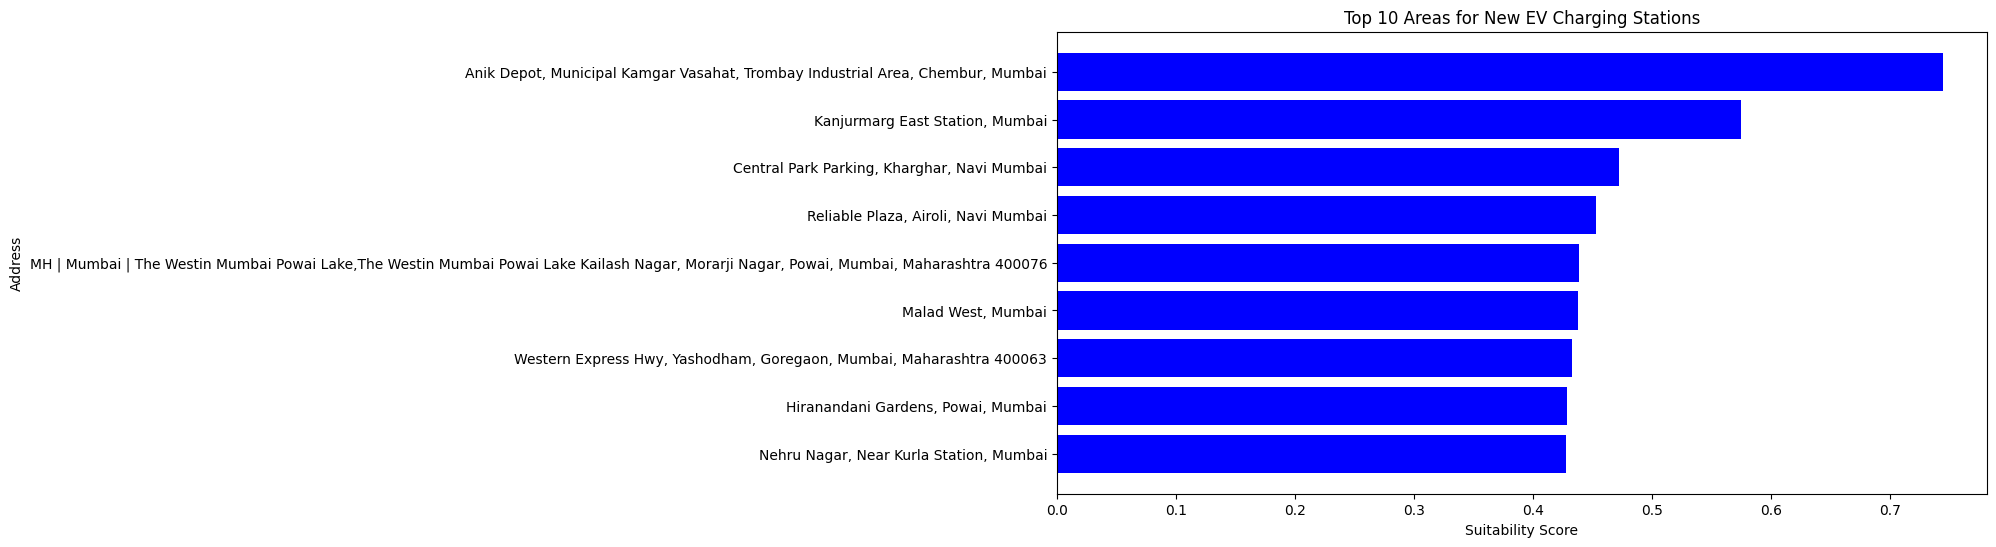

In [11]:
# Find a suitable column for area/location if 'area' is missing
import matplotlib.pyplot as plt

top_areas = feature_df.sort_values(by='suitability_score', ascending=False).head(10)

# Try to use 'area', else fallback to another location-like column
area_col = None
for col in ['area', 'location', 'locality', 'zone', 'region', 'address']:
    if col in top_areas.columns:
        area_col = col
        break
if area_col is None:
    area_col = top_areas.columns[0]  # fallback to first column if nothing matches

plt.figure(figsize=(12,6))
plt.barh(top_areas[area_col], top_areas['suitability_score'], color='blue')
plt.xlabel("Suitability Score")
plt.title("Top 10 Areas for New EV Charging Stations")
plt.gca().invert_yaxis()
plt.ylabel(area_col.replace('_',' ').title())
plt.show()

In [2]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import os

# Load data
if os.path.exists('station_suitability_scores.csv'):
    df = pd.read_csv('station_suitability_scores.csv')
else:
    raise FileNotFoundError('station_suitability_scores.csv not found.')

# Standardize column names to lower case for robust matching
df.columns = [col.lower() for col in df.columns]

# Handle alternate column names
rename_dict = {}
if 'station_key' in df.columns and 'station_id' not in df.columns:
    rename_dict['station_key'] = 'station_id'
if 'sessions_count_final' in df.columns and 'sessions_count' not in df.columns:
    rename_dict['sessions_count_final'] = 'sessions_count'
if 'sessions' in df.columns and 'sessions_count' not in df.columns:
    rename_dict['sessions'] = 'sessions_count'
if 'lat' in df.columns and 'latitude' not in df.columns:
    rename_dict['lat'] = 'latitude'
if 'lon' in df.columns and 'longitude' not in df.columns:
    rename_dict['lon'] = 'longitude'
df = df.rename(columns=rename_dict)

# Validate columns
required_cols = ["latitude", "longitude"]
for col in required_cols:
    if col not in df.columns:
        raise ValueError(f"Missing required column: {col}")

if "suitability_score" not in df.columns:
    df["suitability_score"] = 0.5  # default

label_col = "station_name" if "station_name" in df.columns else df.columns[0]
sessions_col = None
for col in ["sessions_count", "total_sessions", "sessions"]:
    if col in df.columns:
        sessions_col = col
        break
df["_sessions"] = df[sessions_col] if sessions_col else 1

# Drop rows with missing coordinates or session counts
df = df.dropna(subset=["latitude", "longitude"])

# Create base map centered on Mumbai
center_lat = df["latitude"].mean()
center_lon = df["longitude"].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Add existing stations (blue markers)
for _, row in df.iterrows():
    folium.Marker(
        location=[row["latitude"], row["longitude"]],
        popup=f"{row[label_col]}<br>Suitability: {round(row['suitability_score'],2)}",
        icon=folium.Icon(color="blue", icon="bolt", prefix="fa")
    ).add_to(m)

# Add high-suitability predictions (green circle markers)
threshold = 0.8
high = df[df["suitability_score"] >= threshold]
for _, row in high.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=8,
        color='green',
        fill=True,
        fill_opacity=0.7,
        popup=f"High Suitability: {round(row['suitability_score'],2)}"
    ).add_to(m)

# Add heatmap layer
if "_sessions" in df.columns:
    heat_data = [[row["latitude"], row["longitude"], row["_sessions"]] for _, row in df.iterrows()]
else:
    heat_data = [[row["latitude"], row["longitude"], 1] for _, row in df.iterrows()]
HeatMap(heat_data, radius=15, blur=10).add_to(m)

# Save map to HTML file
m.save("ev_station_prediction_map.html")
print("Map saved as ev_station_prediction_map.html. Open this file in your browser to view the map.")

Map saved as ev_station_prediction_map.html. Open this file in your browser to view the map.


In [ ]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster, HeatMap
from IPython.display import display

# -------------------------------
# Load Data
# -------------------------------
file_path = "station_suitability_scores.csv"  # Change if needed
df = pd.read_csv(file_path)

# Validate columns
if "latitude" not in df.columns or "longitude" not in df.columns:
    raise ValueError("CSV must contain 'latitude' and 'longitude' columns.")

if "suitability_score" not in df.columns:
    df["suitability_score"] = 0.5  # Default if missing

label_col = "station_name" if "station_name" in df.columns else df.columns[0]

# -------------------------------
# Parameters
# -------------------------------
threshold = 0.8  # Suitability threshold for new stations
heatmap_enabled = True

# -------------------------------
# Map Initialization with Google Maps
# -------------------------------
center_lat = df["latitude"].mean()
center_lon = df["longitude"].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=12, tiles=None)

# Add Google Maps tile layer
folium.TileLayer(
    tiles='https://{s}.google.com/vt/lyrs=m&x={x}&y={y}&z={z}',
    attr='Google Maps',
    name='Google Maps',
    overlay=False,
    control=True,
    subdomains=['mt0', 'mt1', 'mt2', 'mt3']
).add_to(m)

# -------------------------------
# Marker Clusters
# -------------------------------
existing_cluster = MarkerCluster(name="Existing Stations").add_to(m)
predicted_cluster = MarkerCluster(name="Predicted Stations").add_to(m)

# Existing stations
for _, row in df.iterrows():
    folium.Marker(
        location=[row["latitude"], row["longitude"]],
        popup=f"{row[label_col]}<br>Suitability: {round(row['suitability_score'], 2)}",
        icon=folium.Icon(color="blue", icon="bolt", prefix="fa")
    ).add_to(existing_cluster)

# Predicted stations (high suitability)
high = df[df["suitability_score"] >= threshold]
for _, row in high.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=8,
        color="green",
        fill=True,
        fill_opacity=0.8,
        popup=f"Predicted Location<br>Suitability: {round(row['suitability_score'], 2)}"
    ).add_to(predicted_cluster)

# -------------------------------
# Heatmap
# -------------------------------
if heatmap_enabled:
    if "sessions_count_final" in df.columns:
        heat_data = [[row["latitude"], row["longitude"], row["sessions_count_final"]] for _, row in df.iterrows()]
    else:
        heat_data = [[row["latitude"], row["longitude"], 1] for _, row in df.iterrows()]
    HeatMap(heat_data, radius=15, blur=10, name="Demand Heatmap").add_to(m)

# -------------------------------
# Layer Control
# -------------------------------
folium.LayerControl().add_to(m)

# -------------------------------
# Show Map in Notebook
# -------------------------------
display(m)

# -------------------------------
# Save Map to HTML
# -------------------------------
map_file = "EV_Station_Map.html"
m.save(map_file)
print(f"✅ Map saved as {map_file}. You can open it in your browser.")


FileNotFoundError: [Errno 2] No such file or directory: 'Codes/station_suitability_scores.csv'

In [4]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster, HeatMap
from geopy.distance import geodesic
from IPython.display import display

# -------------------------------
# Load Data
# -------------------------------
existing_file = "station_aggregates.csv"
predicted_file = "station_suitability_scores.csv"

existing = pd.read_csv("station_aggregates.csv")
predicted = pd.read_csv(predicted_file)

# Validate columns
for df, name in [(existing, "Existing"), (predicted, "Predicted")]:
    if not all(col in df.columns for col in ["latitude", "longitude"]):
        raise ValueError(f"{name} file must have 'latitude' and 'longitude' columns.")

if "suitability_score" not in predicted.columns:
    raise ValueError("Predicted file must have 'suitability_score' column.")

# -------------------------------
# Parameters
# -------------------------------
buffer_distance_km = 3
threshold = 0.75  # High suitability
min_distance_km = 3  # Minimum distance from any existing station for economic viability

# -------------------------------
# Compute Distance to Nearest Existing Station
# -------------------------------
distances = []
for _, pred_row in predicted.iterrows():
    pred_point = (pred_row["latitude"], pred_row["longitude"])
    nearest_dist = min(geodesic(pred_point, (ex_row["latitude"], ex_row["longitude"])).km for _, ex_row in existing.iterrows())
    distances.append(nearest_dist)

predicted["nearest_station_km"] = distances

# -------------------------------
# Economic Viability Score
# -------------------------------
# Formula: score = suitability_score * (distance / (distance + 1)) to reward far locations
predicted["economic_score"] = predicted["suitability_score"] * (predicted["nearest_station_km"] / (predicted["nearest_station_km"] + 1))

# Filter top candidates
candidates = predicted[(predicted["suitability_score"] >= threshold) & (predicted["nearest_station_km"] >= min_distance_km)]
candidates = candidates.sort_values(by="economic_score", ascending=False).reset_index(drop=True)

# Save Top 10 candidates
candidates_file = "economic_viable_candidates.csv"
candidates.head(10).to_csv(candidates_file, index=False)
print(f"✅ Top 10 economically viable locations saved to: {candidates_file}")

# -------------------------------
# Create Map with Google Tiles
# -------------------------------
center_lat = predicted["latitude"].mean()
center_lon = predicted["longitude"].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=12, tiles=None)

folium.TileLayer(
    tiles='https://{s}.google.com/vt/lyrs=m&x={x}&y={y}&z={z}',
    attr='Google Maps',
    name='Google Maps',
    overlay=False,
    control=True,
    subdomains=['mt0', 'mt1', 'mt2', 'mt3']
).add_to(m)

existing_cluster = MarkerCluster(name="Existing Stations").add_to(m)
candidate_cluster = MarkerCluster(name="New Station Candidates").add_to(m)

# Existing stations (Green)
for _, row in existing.iterrows():
    folium.Marker(
        location=[row["latitude"], row["longitude"]],
        popup="Existing Station",
        icon=folium.Icon(color="green", icon="bolt", prefix="fa")
    ).add_to(existing_cluster)

# New candidates (Blue) with economic info
for _, row in candidates.iterrows():
    folium.Marker(
        location=[row["latitude"], row["longitude"]],
        popup=f"""
        <b>New Station Candidate</b><br>
        Suitability: {round(row['suitability_score'], 2)}<br>
        Nearest Station: {round(row['nearest_station_km'], 2)} km<br>
        Economic Score: {round(row['economic_score'], 2)}
        """,
        icon=folium.Icon(color="blue", icon="plus", prefix="fa")
    ).add_to(candidate_cluster)

# Heatmap for suitability
heat_data = [[row["latitude"], row["longitude"], row["suitability_score"]] for _, row in predicted.iterrows()]
HeatMap(heat_data, radius=15, blur=10, name="Suitability Heatmap").add_to(m)

folium.LayerControl().add_to(m)

# Display map in notebook & save HTML
display(m)
map_file = "Economic_EV_Station_Map.html"
m.save(map_file)
print(f"✅ Interactive economic map saved as {map_file}. Open in browser for full experience.")


FileNotFoundError: [Errno 2] No such file or directory: 'station_aggregates.csv'

In [18]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster, HeatMap
from geopy.distance import geodesic
from IPython.display import display

# -------------------------------
# Load Data
# -------------------------------
existing_file = "Files/Codes/station_aggregates.csv"
predicted_file = "Files/Codes/station_suitability_scores.csv"

existing = pd.read_csv(existing_file)
predicted = pd.read_csv(predicted_file)

# Validate columns
if not all(col in existing.columns for col in ["latitude", "longitude"]):
    raise ValueError("Existing stations file must have 'latitude' and 'longitude' columns.")
if not all(col in predicted.columns for col in ["latitude", "longitude", "suitability_score"]):
    raise ValueError("Predicted stations file must have 'latitude', 'longitude', and 'suitability_score' columns.")

# -------------------------------
# Parameters
# -------------------------------
threshold = 0.75   # High suitability
min_distance_km = 3  # Minimum distance from existing stations for new sites

# -------------------------------
# Compute distance from existing stations
# -------------------------------
distances = []
for _, pred_row in predicted.iterrows():
    pred_point = (pred_row["latitude"], pred_row["longitude"])
    nearest_dist = min(geodesic(pred_point, (ex_row["latitude"], ex_row["longitude"])).km for _, ex_row in existing.iterrows())
    distances.append(nearest_dist)

predicted["nearest_station_km"] = distances

# -------------------------------
# Economic viability score
# -------------------------------
predicted["economic_score"] = predicted["suitability_score"] * (predicted["nearest_station_km"] / (predicted["nearest_station_km"] + 1))

# Filter top candidates
candidates = predicted[(predicted["suitability_score"] >= threshold) & (predicted["nearest_station_km"] >= min_distance_km)]
candidates = candidates.sort_values(by="economic_score", ascending=False).reset_index(drop=True)

# Save top candidates
candidates_file = "top_new_station_candidates.csv"
candidates.to_csv(candidates_file, index=False)
print(f"✅ Saved recommended new station locations to: {candidates_file}")

# -------------------------------
# Create interactive map
# -------------------------------
center_lat = predicted["latitude"].mean()
center_lon = predicted["longitude"].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=12, tiles=None)

# Add Google Maps layer
folium.TileLayer(
    tiles='https://{s}.google.com/vt/lyrs=m&x={x}&y={y}&z={z}',
    attr='Google Maps',
    name='Google Maps',
    overlay=False,
    control=True,
    subdomains=['mt0', 'mt1', 'mt2', 'mt3']
).add_to(m)

existing_cluster = MarkerCluster(name="Existing Stations").add_to(m)
new_cluster = MarkerCluster(name="New Stations").add_to(m)

# Add existing stations (Green markers)
for _, row in existing.iterrows():
    folium.Marker(
        location=[row["latitude"], row["longitude"]],
        popup="<b>Existing Station</b>",
        icon=folium.Icon(color="green", icon="bolt", prefix="fa")
    ).add_to(existing_cluster)

# Add new stations (Blue markers)
for _, row in candidates.iterrows():
    popup_html = f"""
    <b>Recommended New Station</b><br>
    Suitability Score: {round(row['suitability_score'], 2)}<br>
    Distance from nearest: {round(row['nearest_station_km'], 2)} km<br>
    Economic Score: {round(row['economic_score'], 2)}
    """
    folium.Marker(
        location=[row["latitude"], row["longitude"]],
        popup=popup_html,
        icon=folium.Icon(color="blue", icon="plus", prefix="fa")
    ).add_to(new_cluster)

# Add heatmap for suitability
heat_data = [[row["latitude"], row["longitude"], row["suitability_score"]] for _, row in predicted.iterrows()]
HeatMap(heat_data, radius=15, blur=10, name="Suitability Heatmap").add_to(m)

# Add layer control
folium.LayerControl().add_to(m)

# Display map in notebook & save HTML
display(m)
map_file = "index.html"
m.save(map_file)
print(f"✅ Interactive map saved as {map_file}. Open it in your browser for full functionality.")


✅ Saved recommended new station locations to: top_new_station_candidates.csv


✅ Interactive map saved as index.html. Open it in your browser for full functionality.


In [16]:
import os
print(os.listdir("."))


['Map.ipynb', 'Step 4.ipynb', 'Step 2.ipynb', 'Files', 'step 5.ipynb', 'Step 3.ipynb']
